<h1><center><font size = 10> Assignment 2 </font></center></h1>
<h1><center><font size = 5> Author: Zach Chase </font></center></h1>

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Part 1
Data Exploration. Load the scikit-learn diabetes bunchobject into a variable. Print out the description of the dataset. Load the diabetesfeatures into a pandas dataframe with the proper column names. Add thetarget
variable to this same dataframe. Run a command to look at the data typesof
your dataframe to see if there is any missing data. Perform descriptive statisticson the numeric columns of your dataframe. Plot histograms of your datatoget afeel for each column’s distribution. Split your dataframe into a training andtest
set with 20% of your data being in the test set. Define a correlation matrix. Lookat values highly correlated with the target. Plot the correlation matrix withaSeaborn heatmap. Use a Seaborn pairplot to look at the scatter plots of thethreevalues with the highest target correlation. Prepare a feature set by droppingthetarget from your training dataframe. Copy your training target into a newdataframe.

In [2]:
# Load teh data
diabetes = load_diabetes()

# Print out the description
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [3]:
# Load the data into a Pandas DataFrame
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df['progression'] = diabetes.target # Add target variable
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [4]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
count,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000,442.000
mean,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,0.000,-0.000,-0.000,152.133
std,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,0.048,77.093
min,-0.107,-0.045,-0.090,-0.112,-0.127,-0.116,-0.102,-0.076,-0.126,-0.138,25.000
25%,-0.037,-0.045,-0.034,-0.037,-0.034,-0.030,-0.035,-0.039,-0.033,-0.033,87.000
50%,0.005,-0.045,-0.007,-0.006,-0.004,-0.004,-0.007,-0.003,-0.002,-0.001,140.500
75%,0.038,0.051,0.031,0.036,0.028,0.030,0.029,0.034,0.032,0.028,211.500
max,0.111,0.051,0.171,0.132,0.154,0.199,0.181,0.185,0.134,0.136,346.000


In [5]:
df.dtypes

age            float64
sex            float64
bmi            float64
bp             float64
s1             float64
s2             float64
s3             float64
s4             float64
s5             float64
s6             float64
progression    float64
dtype: object

In [6]:
df.isnull().sum()

age            0
sex            0
bmi            0
bp             0
s1             0
s2             0
s3             0
s4             0
s5             0
s6             0
progression    0
dtype: int64

/var/folders/hh/0cgy4n956v3cxdlwkj7hn7zm0000gn/T/ipykernel_8357/111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


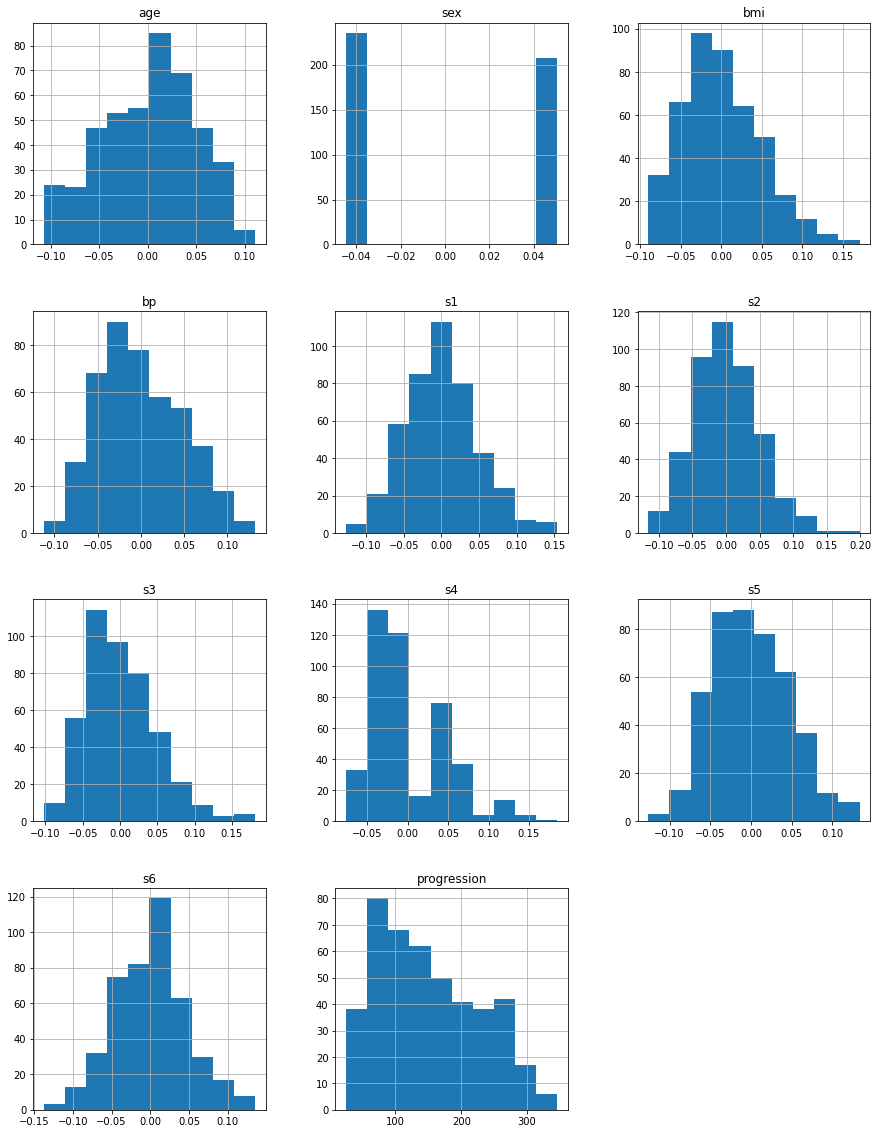

In [7]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [8]:
X = df.drop(['progression'], axis = 1).to_numpy()
y = df['progression'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 8)

In [9]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
age,1.000,0.174,0.185,0.335,0.260,0.219,-0.075,0.204,0.271,0.302,0.188
sex,0.174,1.000,0.088,0.241,0.035,0.143,-0.379,0.332,0.150,0.208,0.043
bmi,0.185,0.088,1.000,0.395,0.250,0.261,-0.367,0.414,0.446,0.389,0.586
bp,0.335,0.241,0.395,1.000,0.242,0.186,-0.179,0.258,0.393,0.390,0.441
s1,0.260,0.035,0.250,0.242,1.000,0.897,0.052,0.542,0.516,0.326,0.212
s2,0.219,0.143,0.261,0.186,0.897,1.000,-0.196,0.660,0.318,0.291,0.174
s3,-0.075,-0.379,-0.367,-0.179,0.052,-0.196,1.000,-0.738,-0.399,-0.274,-0.395
s4,0.204,0.332,0.414,0.258,0.542,0.660,-0.738,1.000,0.618,0.417,0.430
s5,0.271,0.150,0.446,0.393,0.516,0.318,-0.399,0.618,1.000,0.465,0.566
s6,0.302,0.208,0.389,0.390,0.326,0.291,-0.274,0.417,0.465,1.000,0.382


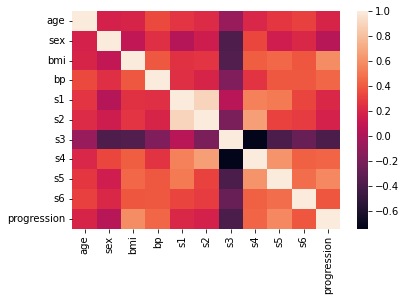

In [10]:
sns.heatmap(df.corr())
plt.show()

The values with large correlations with the target variable are bmi, s5 and bp.

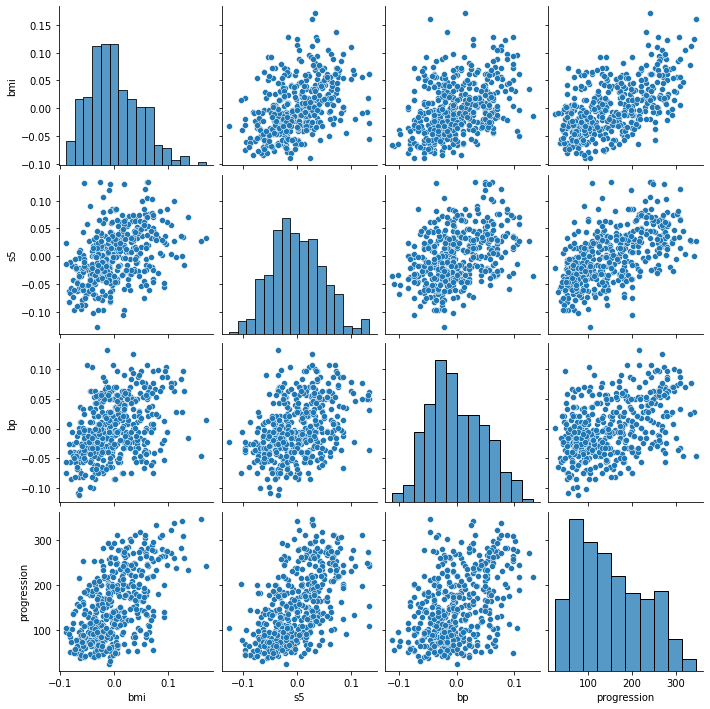

In [11]:
sns.pairplot(df[['bmi', 's5', 'bp', 'progression']])
plt.show()

In [12]:
df_data = df.drop(["progression"], axis = 1)

# Part 2
Model Training. Train a linear regression model usingyour training set. Print the RMSE of your regression model on your trainingset.
Implement a cross_val_score on a decision tree regressor on your trainingset. Print out root mean and standard deviation of the cross-validation scores. Dothesame for a RandomForestRegressor. Record which model performs better

In [13]:
lr = LinearRegression().fit(X_train, y_train)
mean_squared_error(lr.predict(X_train), y_train, squared=False)

53.52303332360084

In [14]:
dt = DecisionTreeRegressor(random_state = 0)
scores = cross_val_score(dt, X_train, y_train, scoring='neg_mean_squared_error')
tree_rmse_scores = np.sqrt(-scores)
print('Scores:', tree_rmse_scores)
print('Mean:', tree_rmse_scores.mean())
print('Standard Deviation:', tree_rmse_scores.std())

Scores: [86.87241738 67.06818057 58.79589906 78.39014151 86.90454534]
Mean: 75.60623677128038
Standard Deviation: 11.115885795540445


In [15]:
rf = RandomForestRegressor(random_state = 0)
scores = cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error')
forest_rmse_scores = np.sqrt(-scores)
print('Scores:', forest_rmse_scores)
print('Mean:', forest_rmse_scores.mean())
print('Standard Deviation:', forest_rmse_scores.std())

Scores: [61.30249194 55.87481736 53.26801998 58.49416513 57.28084524]
Mean: 57.244067930466386
Standard Deviation: 2.6727777868924174


Note that the linear regression model had a rmse of 53.5. Of the two other methods, the random forest regressor performed better with an rmse of 57.2, compared to the decision tree regressor which has an rmse of 75.6.

# Part 3
Model Tuning. Print out the parameters of your randomforest model. Do a grid search cross-validation with the following values:
n_estimators: 3,10,30 and max_features: 2,4,6,8, as well as the followingexperiment: bootstrap: False, n_estimators: 3,10 and max_features: 2,3,4. Print
out the best parameters and the best performing model based on this gridsearch. Using the cv_results dictionary, print out the rmse of each feature combinationforcomparison. Also print out the feature importances of the best performinggridsearch model. Describe how it compares with the correlation matrix we
implemented earlier.

In [16]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [17]:
param_grid = [{'n_estimators': [3,10,30], 'max_features':[2,4,6,8]}, 
              {'bootstrap':[False], 'n_estimators':[3,10], 'max_features':[2,3,4]}]

gridsearch = GridSearchCV(rf, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [18]:
gridsearch.best_params_

{'max_features': 2, 'n_estimators': 30}

In [19]:
gridsearch.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30, random_state=0)

In [20]:
for mean_score, params in zip(gridsearch.cv_results_['mean_test_score'], gridsearch.cv_results_['params']):
    print(np.sqrt(-mean_score), params)

66.56448231814123 {'max_features': 2, 'n_estimators': 3}
58.71336563188093 {'max_features': 2, 'n_estimators': 10}
57.00746888951012 {'max_features': 2, 'n_estimators': 30}
63.763617439803504 {'max_features': 4, 'n_estimators': 3}
58.36657638954524 {'max_features': 4, 'n_estimators': 10}
57.67796345077726 {'max_features': 4, 'n_estimators': 30}
65.55971656738728 {'max_features': 6, 'n_estimators': 3}
59.697585238431536 {'max_features': 6, 'n_estimators': 10}
58.164205376101464 {'max_features': 6, 'n_estimators': 30}
65.93077808067544 {'max_features': 8, 'n_estimators': 3}
59.95173864869986 {'max_features': 8, 'n_estimators': 10}
58.36171852834644 {'max_features': 8, 'n_estimators': 30}
66.5450362283722 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
58.37347732946187 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
66.48847732360835 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
59.78656039633108 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

In [21]:
feature_importance = gridsearch.best_estimator_.feature_importances_
sorted(zip(feature_importance, df.drop(['progression'], axis = 1)), reverse = True)

[(0.19467648239438923, 'bmi'),
 (0.1689688310656527, 's5'),
 (0.11382509982887441, 's6'),
 (0.11371008275085166, 'bp'),
 (0.1077977953531165, 's3'),
 (0.08865357137386391, 's4'),
 (0.0705691088461838, 's1'),
 (0.0652733825212872, 'age'),
 (0.06134716813141679, 's2'),
 (0.015178477734363819, 'sex')]

Note that the values we looked at earlier with the largest correlation values with our target variable were bmi, s5, and bp. These variables are 3 of the 4 most important according to our random forest model.

# Part 4
Model Evaluation. Document the best-performingmodel
between the single feature model you trained in Assignment 1, and the modelsyou trained in part 2 and 3 of this assignment. Evaluate the best performingmodel against your test set. Save your model for future use.

In [22]:
# Load Data
diabetes_data = load_diabetes()
X_bmi = diabetes_data.data
y_bmi = diabetes_data.target

X_train_bmi = X_bmi[:-20,2].reshape(-1,1)
X_test_bmi = X_bmi[:20,2].reshape(-1,1)
y_train_bmi = y_bmi[:-20].reshape(-1,1)
y_test_bmi = y_bmi[:20].reshape(-1,1)

diabetes_lm_bmi = LinearRegression().fit(X_train_bmi, y_train_bmi)

value = mean_squared_error(y_train_bmi, diabetes_lm_bmi.predict(X_train_bmi), squared = False)
print("Assignment 1 RMSE with train data using BMI only: ", value)

Assignment 1 RMSE with train data using BMI only:  62.888948579232846


In [23]:
value = min(np.sqrt(-gridsearch.cv_results_['mean_test_score']))
print("Random Forest RMSE with train data: ", value)

Random Forest RMSE with train data:  57.00746888951012


In [24]:
value = mean_squared_error(lr.predict(X_train), y_train, squared=False)
print("Linear Regression RMSE with train data: ", value)

Linear Regression RMSE with train data:  53.52303332360084


In [25]:
value_bmi = mean_squared_error(diabetes_lm_bmi.predict(X_test[:,2].reshape(-1,1)), y_test, squared = False)
value_lr = mean_squared_error(lr.predict(X_test), y_test, squared=False)
value_rf = mean_squared_error(gridsearch.best_estimator_.predict(X_test), y_test, squared = False)

print("Linear Regression with BMI on test data RMSE: ", value_bmi)
print("Linear Regression with all on test data RMSE: ", value_lr)
print("Random Forest on test data RMSE: ", value_rf)

Linear Regression with BMI on test data RMSE:  61.78255547054751
Linear Regression with all on test data RMSE:  54.20188596747386
Random Forest on test data RMSE:  58.16917619045893


From these results it appears the model that performs best at minimizing RMSE is the Linear Regression model using all of the features. On the training data it has a RMSE of 53.52, and on the test data it has a RMSE of 54.20.

In [26]:
import joblib
joblib.dump(lr, "my_lr_model.pkl")

['my_lr_model.pkl']

In [27]:
!ls my_lr_model.*

my_lr_model.pkl
